# Adaline Test

In [1]:
import json

with open('cmake-build-debug/bin/adaline_training_evolution.json', 'r') as file:
    test_output = json.load(file)

In [2]:
test_data = test_output['data']
test_labels = test_output['labels']
learning_evolution = test_output['weights']

trainig_iterations = len(learning_evolution)
weights = learning_evolution[-1]

In [3]:
test_data

[[0.0, 2.0],
 [1.0, 0.0],
 [1.0, 1.0],
 [1.0, 2.0],
 [1.0, 3.0],
 [1.0, 3.5],
 [2.0, 1.0],
 [2.0, 2.0],
 [2.0, 3.0],
 [2.0, 3.5],
 [3.0, 0.0],
 [3.0, 2.0],
 [2.7, 3.3],
 [4.0, 1.0],
 [1.0, 4.0],
 [2.0, 4.0],
 [2.0, 5.0],
 [2.5, 3.0],
 [2.5, 4.0],
 [3.0, 3.0],
 [3.0, 4.5],
 [3.0, 6.0],
 [4.0, 2.5],
 [4.0, 3.5],
 [4.0, 5.0],
 [5.0, 2.0],
 [5.0, 3.0],
 [5.0, 4.0]]

In [4]:
red_dots = []
blue_dots = []

for i, dot in enumerate(test_data):
    if test_labels[i] == 1:
        red_dots.append(dot)
    elif test_labels[i] == -1:
        blue_dots.append(dot)

In [5]:
def hypothesis(x):
    return (-(weights[0]/weights[1]) * x) - (weights[2] / weights[1])

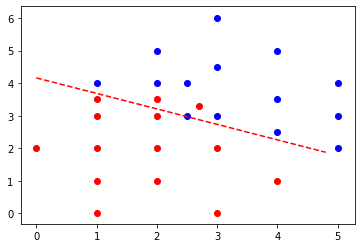

In [6]:
import matplotlib.pyplot as plt
import numpy as np

plt.scatter([point[0] for point in red_dots], [point[1] for point in red_dots], c='red')
plt.scatter([point[0] for point in blue_dots], [point[1] for point in blue_dots], c='blue')

x = np.arange(0., 5., 0.2)
y = []

for t in x:
    y.append(hypothesis(t))
    
plt.plot(x, y, 'r--')

In [7]:
def iterated_hypothesis(iteration, x):
    _weights = learning_evolution[iteration]
    
    return (-(_weights[0]/_weights[1]) * x) - (_weights[2] / _weights[1])

In [ ]:
import numpy as np
import matplotlib
matplotlib.use("Agg")
import matplotlib.pyplot as plt
import matplotlib.animation as animation

# Set up formatting for the movie files
Writer = animation.writers['ffmpeg']
writer = Writer(fps=30, metadata=dict(artist='Me'), bitrate=1800)

fig1 = plt.figure()
plt.ylim(0, 5)
plt.xlim(0,5)
x = np.arange(0., 5., 0.2)

ims = []
for i in range(trainig_iterations):
    for j in range(3):
        y = [iterated_hypothesis(i, t) for t in x]

        ims.append((
            plt.scatter([point[0] for point in red_dots], [point[1] for point in red_dots], c='red'),
            plt.scatter([point[0] for point in blue_dots], [point[1] for point in blue_dots], c='blue'),
            plt.plot(x, y, 'r--')[0]
        ))
        
for j in range(20):
    y = [hypothesis(t) for t in x]

    ims.append((
        plt.scatter([point[0] for point in red_dots], [point[1] for point in red_dots], c='red'),
        plt.scatter([point[0] for point in blue_dots], [point[1] for point in blue_dots], c='blue'),
        plt.plot(x, y, 'r--')[0]
    ))

im_ani = animation.ArtistAnimation(fig1, ims, interval=100, repeat_delay=10000,
                                   blit=True)
im_ani.save('perceptron.mp4', writer=writer)